<a href="https://colab.research.google.com/github/AeyshaAkterPurnia/CVPR/blob/main/Number-detection/mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import random
import numpy as np

In [2]:
(train_img, train_labels),(test_img, test_labels) = mnist.load_data()
print(f"shape of train images: {train_img.shape}")
print(f"shape of train lables: {train_labels.shape}")
print(f"shape of test images: {test_img.shape}")
print(f"shape of test labels: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape of train images: (60000, 28, 28)
shape of train lables: (60000,)
shape of test images: (10000, 28, 28)
shape of test labels: (10000,)


image in index 0 is '5'


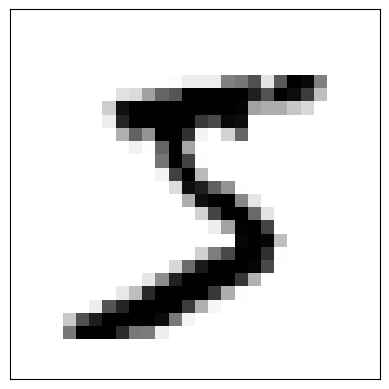

In [3]:
index = 0
img = train_img[index]
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")

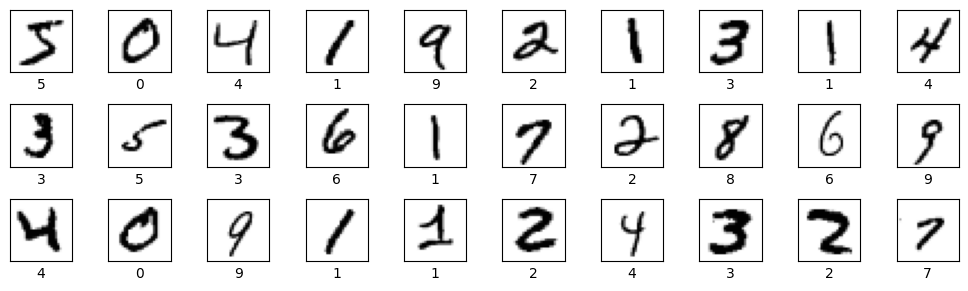

In [4]:
i = 0
plt.figure(figsize = (10,3))
for row in range(3):
    for column in range(10):
        plt.subplot(3, 10, i+1)
        plt.imshow(train_img[i], cmap = plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
train_img = train_img.reshape(-1, 28*28).astype('float32')/255.0
test_img = test_img.reshape(-1, 28*28).astype('float32')/255.0

image in index 0 is '5'


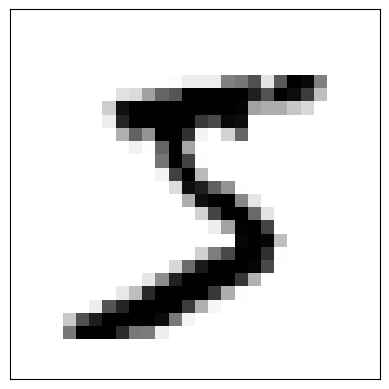

In [6]:
index = 0
img = train_img[index].reshape(28,28)
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")

In [7]:
model = keras.Sequential([
    keras.Input(shape=((28*28), )),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
tModel = model.fit(train_img, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8585 - loss: 0.4738 - val_accuracy: 0.9607 - val_loss: 0.1276
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9671 - loss: 0.1066 - val_accuracy: 0.9688 - val_loss: 0.1025
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9797 - loss: 0.0638 - val_accuracy: 0.9709 - val_loss: 0.0899
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9843 - loss: 0.0481 - val_accuracy: 0.9729 - val_loss: 0.1003
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0.9730 - val_loss: 0.0973


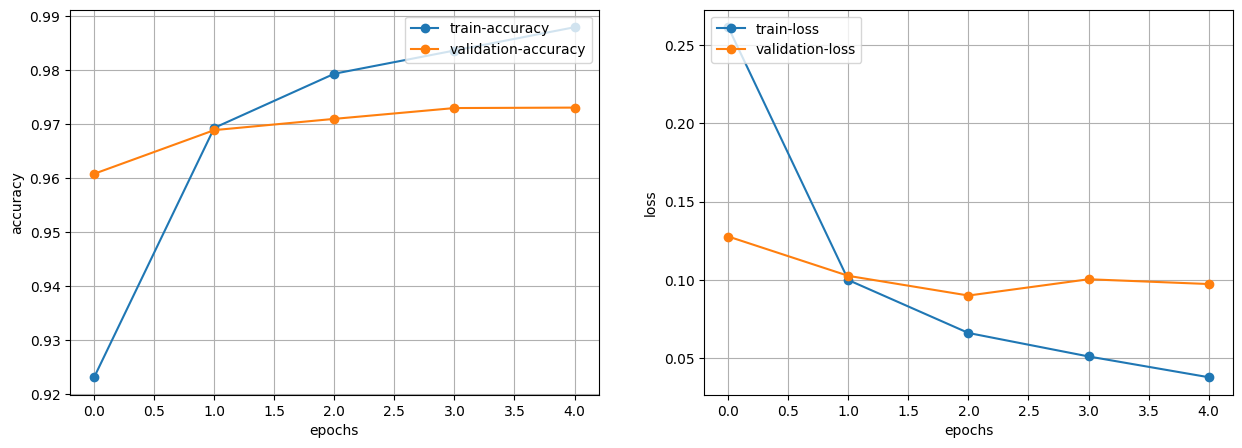

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(tModel.history['accuracy'], 'o-', label='train-accuracy')
plt.plot(tModel.history['val_accuracy'], 'o-', label='validation-accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(tModel.history['loss'], 'o-', label='train-loss')
plt.plot(tModel.history['val_loss'], 'o-', label='validation-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend(loc='upper left')

In [12]:
test_loss, test_accuracy = model.evaluate(test_img, test_labels)
print('\ntest accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0982

test accuracy:  0.9757999777793884


In [13]:
predictions = model.predict(test_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


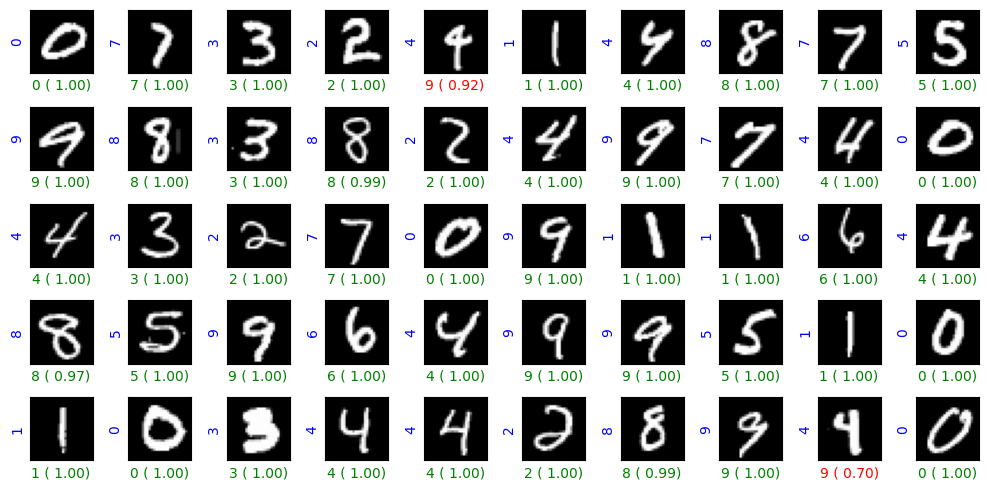

In [14]:
random_indices = random.sample(range(test_img.shape[0]), 5*10)
sample_images = test_img[random_indices, : ]
sample_labels = test_labels[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(10,5))
for rows in range(5):
    for column in range(10):
        plt.subplot(5, 10, i+1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='g')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='b')
        i += 1
plt.tight_layout()
plt.show()

In [16]:
model.save('mnist_nn.keras')